# NMF with sparsity Constraint from Hoyer 2004

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import morphoMaths
import pandas as pd
from scipy import io
import metrics

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
print('x_test shape:', x_test.shape)
x_small = x_test[:10]
x_small[2] = x_test[31]

x_test shape: (10000, 28, 28, 1)


## Sh = 0.6, dim=100

In [3]:
data = io.loadmat('../Results/MNIST_Fashion/NMF/18_08_22_sparseNMF_dim100_spH0.6')
W = data['W']
H = data['H']
del data
print('W: ', W.shape)
print('H: ', H.shape)
atoms = W.transpose().reshape(100,28,28,1)
H = H.transpose()
x_test_rec_nmf = metrics.reconstructions(atoms, H)
del W

W:  (784, 100)
H:  (100, 10000)


In [4]:
x_small_rec_nmf = x_test_rec_nmf[:10]
x_small_rec_nmf[2] = x_test_rec_nmf[31]

In [5]:
H_small = H[:10]
H_small[2] = H[31]

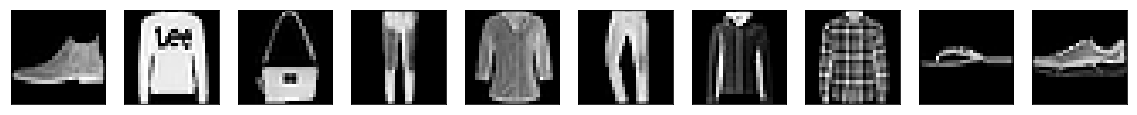

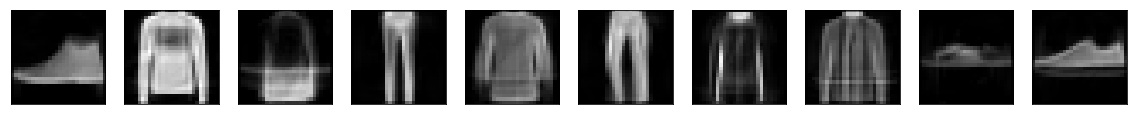

In [6]:
bastien_utils.plot_all_images(x_small, save_as_eps=True, file_path='x_small.eps')
bastien_utils.plot_all_images(x_small_rec_nmf, v_min=0, v_max=1, save_as_eps=True, file_path='NMF_fashion_MNIST_rec.eps')

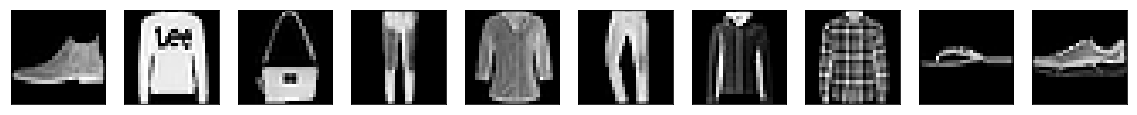

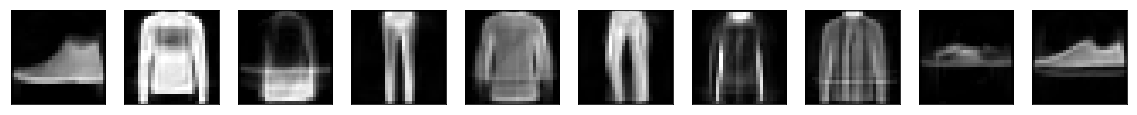

In [9]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_small_rec_nmf, v_min=0, v_max=1)

In [ ]:
bastien_utils.plot_all_images(atoms[:100], save_as_eps=True, file_path='NMF_fashion_MNIST_atoms.eps')

In [21]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)

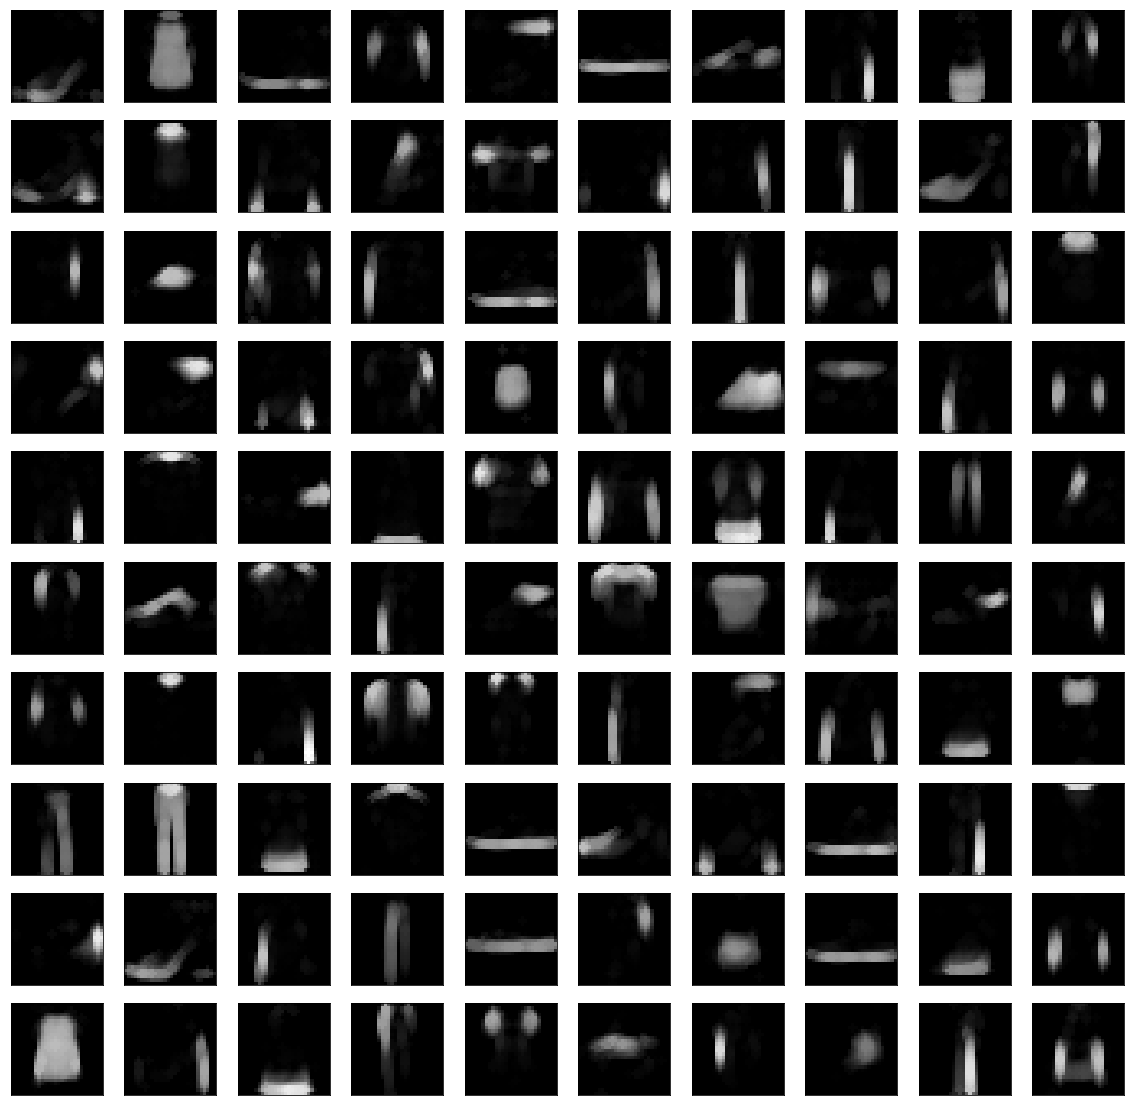

In [22]:
bastien_utils.plot_all_images(atoms_dil)

In [11]:
print('Reconstruction error: ', metrics.reconstruction_error(x_test, atoms, H))
print('Max-approximation error to dilatation (original): ', metrics.max_approximation_error(x_test, atoms, H, morphoMaths.dilatation, SE_scale=1)[0])
print('Max-approximation error to dilatation (reconstruction): ', metrics.max_approximation_error(x_test, atoms, H, morphoMaths.dilatation, SE_scale=1)[1])


Reconstruction error:  0.01094606
Max-approximation error to dilatation (original):  0.10730002934067392
Max-approximation error to dilatation (reconstruction):  0.10570523420711277


Dilatation of original images


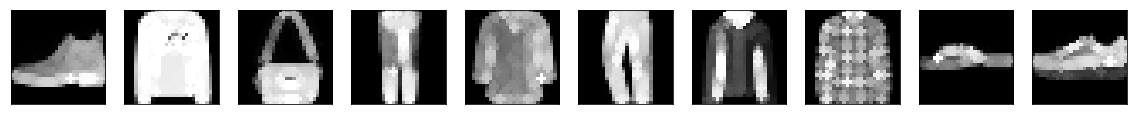

Dilatation of reconstructed images


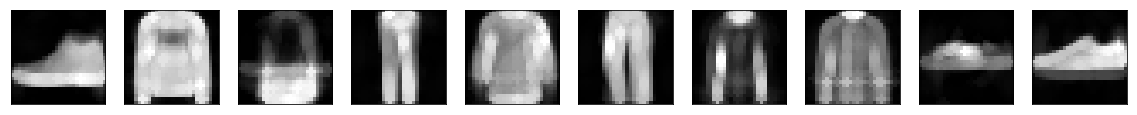

Max-approximation to dilatation


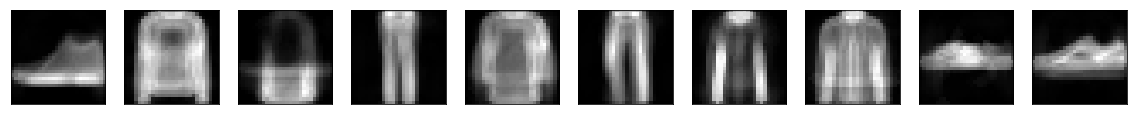

In [23]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small_rec_nmf, SE_scale=1))
print('Max-approximation to dilatation')
metrics.plot_max_approximation(atoms, H_small, morphoMaths.dilatation, SE_scale=1)

In [15]:
print("Sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(H))

Sparsity Measure of the encoding (Hoyer):  0.6503538


In [4]:
print("KL divergence sparsity measure to 0.01: ", metrics.sparsity_KL_divergence(H))

KL divergence sparsity measure to 0.01:  0.3091793358325958


In [1]:
print("Best classification score: 0.842, with C=21.544347, gamma=27.825594")

Best classification score: 0.842, with C=21.544347, gamma=27.825594


In [8]:
metrics.best_linearSVM_classification_score(H, y_test, nb_values_C=30)

Fitting 20 folds for each of 30 candidates, totalling 600 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ........................... C=0.022122162910704492, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] .

[CV] ............................ C=0.07278953843983153, total=   0.4s
[CV] C=0.07278953843983153 ...........................................
[CV] ............................ C=0.07278953843983153, total=   0.4s
[CV] C=0.07278953843983153 ...........................................
[CV] ............................ C=0.07278953843983153, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] .

[CV] ............................. C=0.2395026619987486, total=   0.5s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.5s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.5s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.5s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.5s
[CV] C=0.35622478902624444 ...........................................
[CV] ............................ C=0.35622478902624444, total=   0.5s
[CV] C=0.35622478902624444 ...........................................
[CV] ............................ C=0.35622478902624444, total=   0.6s
[CV] C=0.35622478902624444 ...........................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.9s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.9s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.9s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.9s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=2.592943797404667, total=   0.6s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.6s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.6s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.6s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.6s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.6s
[CV] C=2.592943797404667 .............................................
[CV] .

[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.6s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .

[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.7s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] .

[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  6.2min finished


(0.8124000000000001, 0.03614194239384484, {'C': 452.035365636025})

In [9]:
metrics.best_linearSVM_classification_score(H, y_test, nb_values_C=30)

Fitting 20 folds for each of 30 candidates, totalling 600 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.4s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.4s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ........................... C=0.022122162910704492, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.4s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] ............................ C=0.03290344562312668, total=   0.3s
[CV] C=0.03290344562312668 ...........................................
[CV] .

[CV] ............................ C=0.07278953843983153, total=   0.4s
[CV] C=0.07278953843983153 ...........................................
[CV] ............................ C=0.07278953843983153, total=   0.4s
[CV] C=0.07278953843983153 ...........................................
[CV] ............................ C=0.07278953843983153, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.5s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.5s
[CV] C=0.10826367338740546 ...........................................
[CV] ............................ C=0.10826367338740546, total=   0.4s
[CV] C=0.10826367338740546 ...........................................
[CV] .

[CV] ............................. C=0.2395026619987486, total=   0.6s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.6s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.5s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.6s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   0.8s
[CV] C=0.35622478902624444 ...........................................
[CV] ............................ C=0.35622478902624444, total=   0.6s
[CV] C=0.35622478902624444 ...........................................
[CV] ............................ C=0.35622478902624444, total=   0.6s
[CV] C=0.35622478902624444 ...........................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   0.6s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.8s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .............................. C=2.592943797404667, total=   0.7s
[CV] C=2.592943797404667 .............................................
[CV] .

[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .............................. C=8.531678524172815, total=   0.7s
[CV] C=8.531678524172815 .............................................
[CV] .

[CV] ............................. C=28.072162039411786, total=   0.8s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.8s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.8s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.7s
[CV] C=28.072162039411786 ............................................
[CV] ............................. C=28.072162039411786, total=   0.8s
[CV] C=28.072162039411786 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   0.9s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.9s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   0.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.0s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................. C=303.91953823132013, total=   0.9s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   1.1s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.9s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.8s
[CV] C=303.91953823132013 ............................................
[CV] ............................. C=303.91953823132013, total=   0.9s
[CV] C=303.91953823132013 ............................................
[CV] .

[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.9s
[CV] C=1000.0 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.6min finished


(0.7944, 0.034650252524332334, {'C': 1000.0})

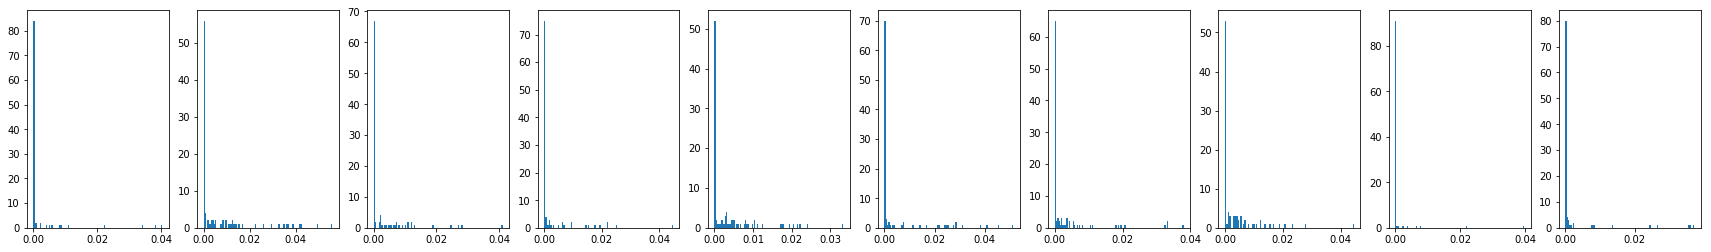

In [9]:
plt.figure(figsize=(30, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    ax.hist(H_small[i], bins=100)
plt.show()

In [10]:
import atoms_analysis

In [11]:
atoms_analysis.Hoyer_sparsity_of_atoms(atoms)

0.7620479

In [27]:
atoms_analysis.Hoyer_sparsity_of_atoms(atoms_dil)

0.6671730198851527

Atoms associated with the 10 highest code coefficients of the image


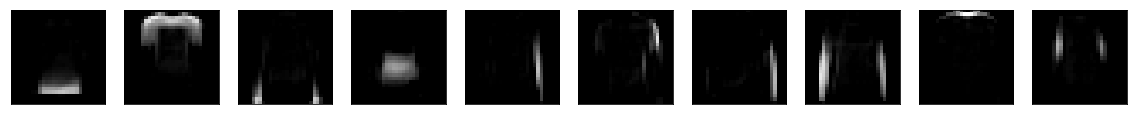

In [12]:
atoms_analysis.plot_10_most_used_atoms_for_an_image(H_small[1], atoms)

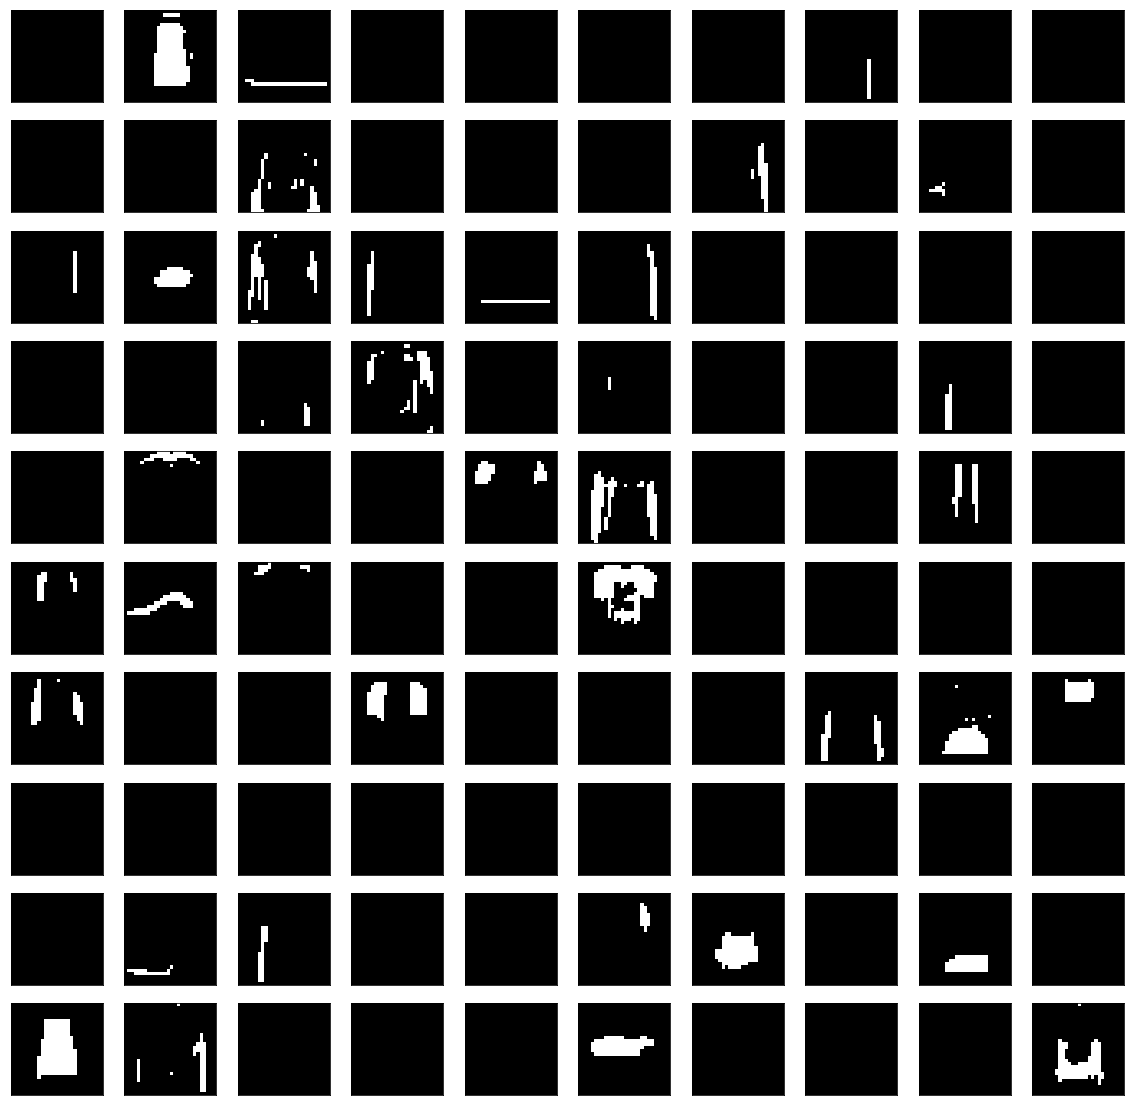

In [19]:
atoms_analysis.plot_binarized_weighted_atoms(atoms, H_small[1], nb_atoms_to_use_for_threshold_computation=100)

<Figure size 1728x432 with 0 Axes>

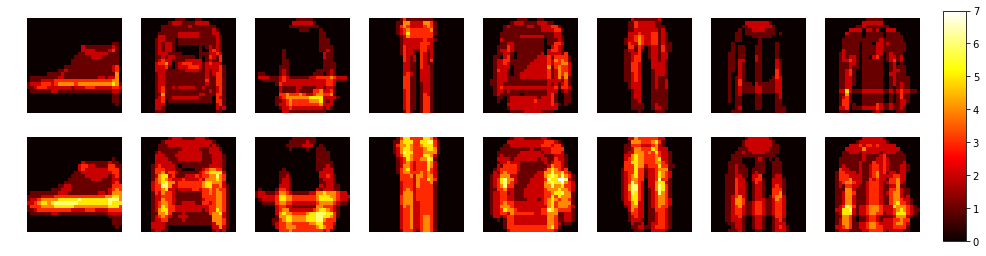

In [24]:
atoms_analysis.plot_heat_map_of_overlapping_atoms(H_small,atoms, dilated_atoms=atoms_dil, number_of_atoms=50, nb_atoms_to_use_for_threshold_computation=20)

In [26]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, H[:1000])

0.005207539474223018

In [28]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, H[:1000])

0.009338041905520454

# Interest of Max-Approximation

In [3]:
import time

In [42]:
dilation_times = np.zeros(100)
max_approximation_times = np.zeros(100)
for i in range(100):
    t1 = time.time()
    bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)
    t2=time.time()
    dilation_times[i] = t2 - t1
    
    t1 = time.time()
    metrics.reconstructions(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1), H)
    t2 = time.time()
    max_approximation_times[i] = t2 - t1

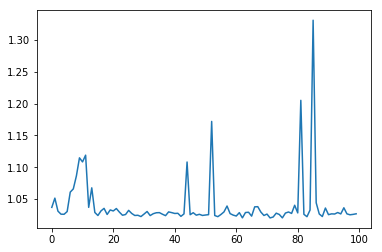

In [45]:
mean_dilation_times = np.mean(dilation_times)
plt.plot(np.arange(100), dilation_times)
plt.show()

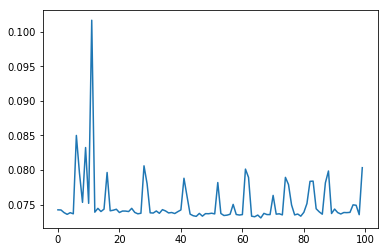

In [47]:
mean_max_approx_times = np.mean(max_approximation_times)
plt.plot(np.arange(100), max_approximation_times)
plt.show()

In [48]:
print("Time to compute dilation of all 10000 test images: ", mean_dilation_times)
print("Time to compute max_approximation to dilation of all 10000 test images: ", mean_max_approx_times)
print("Relative diffence: ", 100*(mean_dilation_times-mean_max_approx_times)/mean_dilation_times)

Time to compute dilation of all 10000 test images:  1.0395511412620544
Time to compute max_approximation to dilation of all 10000 test images:  0.07521935462951661
Relative diffence:  92.76424683270537


In [51]:
np.std(dilation_times)
np.std(max_approximation_times)

0.003530707198435845